In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from circlePacking.shapefill import ShapeFill


In [2]:
df = pd.read_csv('grant.csv', sep=';')

In [3]:
df_2024 = df[df['CallDecisionYear'] == 2024]

In [4]:
df_2024

,GrantNumber,GrantNumberString,Title,TitleEnglish,ResponsibleApplicantName,FundingInstrumentPublished,FundingInstrumentReporting,FundingInstrumentLevel1,Institute,InstituteCity,...,MainFieldOfResearch_LevelB,AllFieldOfResearchs,EffectiveGrantStartDate,EffectiveGrantEndDate,AmountGrantedAllSets,Keywords,State,CallFullTitle,CallEndDate,CallDecisionYear
23,226697,40B1-0_226697,Meal Drinks Against Frailty: Elderly Nutrition...,NaN,"Bergfreund, Jotam",Bridge - Proof of Concept,Bridge - Proof of Concept,Programmes,Institut für Lebensmittel- und Ernährungswisse...,8092 Zürich,...,na,40/3210,2024-08-01T00:00:00Z,2025-07-31T00:00:00Z,130000.0,Meal Drink; Malnutrition; Formulation; Rheolog...,Ongoing,Bridge - Proof of Concept 2024 March,2024-03-04T00:00:00Z,2024
33,232544,10BP12_232544,"Politics of the Future: Living, leaving, and t...","Politics of the Future: Living, leaving, and t...","Pedersen, Oliver",Open Access Books,Open Access Books,Science communication,Institut de Psychologie et Education Universi...,2000 Neuchâtel,...,na,52/4401,2024-12-01T00:00:00Z,2025-05-31T00:00:00Z,3500.0,NaN,Approved,Open Access Books 2024,2024-12-31T00:00:00Z,2024
36,10002104,320030-231255,decodePI: decoding the genetic architecture of...,NaN,"Diss, Guillaume",Project funding,Project funding,Projects,Friedrich Miescher Institute for Biomedical Re...,4058 Basel,...,Biochemistry and cell biology/Bioinformatics a...,3101/3102/3105/4602/4611,2024-10-01T00:00:00Z,2028-09-30T00:00:00Z,800000.0,protein-protein interactions; genetic architec...,Ongoing,Project funding (03.04.2024),2024-04-03T00:00:00Z,2024
38,225472,P500PT_225472,Critical behaviour of statistical mechanics mo...,NaN,"Panis, Romain",Postdoc.Mobility,Fellowships,Careers,Institut Camille Jordan Université Claude Ber...,F-69622 Lyon,...,na,49,2024-09-01T00:00:00Z,2026-08-31T00:00:00Z,110600.0,Percolation; Spin models; Ising model; Sharpne...,Ongoing,Postdoc.Mobility 2024 February,2024-02-01T00:00:00Z,2024
39,10002976,200021-231762,Spatial and temporal characterization of soft ...,NaN,"David, Christian",Project funding,Project funding,Projects,Labor für Mikro- und Nanotechnologie Paul Sche...,5232 Villigen PSI,...,Synchrotrons and accelerators,5110/5102/5104,2025-01-01T00:00:00Z,2028-12-31T00:00:00Z,574720.0,NaN,Approved,Project funding (03.04.2024),2024-04-03T00:00:00Z,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86778,10000481,100018-227565,Understanding Tax Enforcement,NaN,"Weber, Matthias",Project funding,Project funding,Projects,Swiss Institute of Banking and Finance Univer...,9000 St. Gallen,...,na/Applied economics,38/3801,2024-09-01T00:00:00Z,2028-08-31T00:00:00Z,560278.0,tax enforcement; tax administration; preferenc...,Ongoing,Project funding (02.10.2023),2023-10-02T00:00:00Z,2024
86891,223357,PZ00P1_223357,The Silenced Salience of Masculinity. Gender a...,NaN,"Wyss, Anna",Ambizione,Ambizione,Careers,Institute of Social Anthropology Department of...,3012 Bern,...,Anthropology,4401/44,2025-02-01T00:00:00Z,2029-01-31T00:00:00Z,965481.0,NaN,Approved,Ambizione 2023,2023-11-01T00:00:00Z,2024
86902,10002212,320030-231316,Investigating the role of the psychedelic expe...,NaN,"Liechti, Matthias E",Project funding,Project funding,Projects,Klinische Pharmakologie & Toxikologie Univers...,4031 Basel,...,Pharmacology and pharmaceutical sciences,3214/3202,2024-11-01T00:00:00Z,2028-10-31T00:00:00Z,1200000.0,DMT; Psychedelic; Depression; Neuroplasticity;...,Ongoing,Project funding (03.04.2024),2024-04-03T00:00:00Z,2024
86925,10001174,IC00I0L-228023,Exploring Conditioned Pain Modulation in horse...,NaN,"Spadavecchia, Claudia",Project funding,Project funding,Projects,Anaesthesiology and Pain Therapy Section Dept....,3012 Bern,...,Veterinary sciences,3009/4602,2024-06-01T00:00:00Z,2028-05-31T00:00:00Z,670480.0,NaN,Approved,Project funding (02.10.2023),2023-10-02T00:00:00Z,2024


In [5]:
df_2024 = df_2024[['GrantNumber', 'Title', 'ResponsibleApplicantName', 'FundingInstrumentLevel1', 'Institute', 'InstituteCity', 'InstituteCountry', 'ResearchInstitution', 'MainDiscipline_Level1', 'MainDiscipline_Level2', 'MainFieldOfResearch_LevelA', 'AmountGrantedAllSets', 'State', 'CallDecisionYear']]
df_2024

,GrantNumber,Title,ResponsibleApplicantName,FundingInstrumentLevel1,Institute,InstituteCity,InstituteCountry,ResearchInstitution,MainDiscipline_Level1,MainDiscipline_Level2,MainFieldOfResearch_LevelA,AmountGrantedAllSets,State,CallDecisionYear
23,226697,Meal Drinks Against Frailty: Elderly Nutrition...,"Bergfreund, Jotam",Programmes,Institut für Lebensmittel- und Ernährungswisse...,8092 Zürich,Switzerland,ETH Zurich - ETHZ,"Mathematics, Natural- and Engineering Sciences",Engineering Sciences,Engineering,130000.0,Ongoing,2024
33,232544,"Politics of the Future: Living, leaving, and t...","Pedersen, Oliver",Science communication,Institut de Psychologie et Education Universi...,2000 Neuchâtel,Switzerland,University of Neuchatel - NE,Humanities and Social Sciences,"Psychology, educational studies",Psychology,3500.0,Approved,2024
36,10002104,decodePI: decoding the genetic architecture of...,"Diss, Guillaume",Projects,Friedrich Miescher Institute for Biomedical Re...,4058 Basel,Switzerland,Institute Friedrich Miescher - FMI,NaN,NaN,Biological Sciences/Biological Sciences/Biolog...,800000.0,Ongoing,2024
38,225472,Critical behaviour of statistical mechanics mo...,"Panis, Romain",Careers,Institut Camille Jordan Université Claude Ber...,F-69622 Lyon,France,Institution abroad - France,"Mathematics, Natural- and Engineering Sciences",Mathematics,Mathematical Sciences,110600.0,Ongoing,2024
39,10002976,Spatial and temporal characterization of soft ...,"David, Christian",Projects,Labor für Mikro- und Nanotechnologie Paul Sche...,5232 Villigen PSI,Switzerland,Paul Scherrer Institute - PSI,NaN,NaN,Physical Sciences,574720.0,Approved,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86778,10000481,Understanding Tax Enforcement,"Weber, Matthias",Projects,Swiss Institute of Banking and Finance Univer...,9000 St. Gallen,Switzerland,University of St.Gallen - SG,NaN,NaN,Economics/Economics,560278.0,Ongoing,2024
86891,223357,The Silenced Salience of Masculinity. Gender a...,"Wyss, Anna",Careers,Institute of Social Anthropology Department of...,3012 Bern,Switzerland,University of Berne - BE,Humanities and Social Sciences,"Ethnology, social and human geography",Human Society,965481.0,Approved,2024
86902,10002212,Investigating the role of the psychedelic expe...,"Liechti, Matthias E",Projects,Klinische Pharmakologie & Toxikologie Univers...,4031 Basel,Switzerland,University of Basel - BS,NaN,NaN,Biomedical and Clinical Sciences,1200000.0,Ongoing,2024
86925,10001174,Exploring Conditioned Pain Modulation in horse...,"Spadavecchia, Claudia",Projects,Anaesthesiology and Pain Therapy Section Dept....,3012 Bern,Switzerland,University of Berne - BE,NaN,NaN,"Agricultural, Veterinary and Food Sciences",670480.0,Approved,2024


In [6]:
# Minimal dataset just to prototype. Rename GrantNumber	to id, Title to title, AmountGrantedAllSets to amount, CallDecisionYear to year, and discard the rest
df_2024 = df_2024.rename(columns={'GrantNumber': 'id', 'Title': 'title', 'AmountGrantedAllSets': 'amount', 'CallDecisionYear': 'year', 'FundingInstrumentLevel1': "type"})

df_2024 = df_2024[['id', 'title', 'amount', 'year', "type"]] 

In [7]:
# Export to json
# df_2024.to_json('../app/public/data/grant_2024.json', orient='records')

# Export list of amount to csv
#df_2024[['id','amount']].to_csv('radii.csv', index=False)

In [ ]:
# Pack circles in a cross
array_radius = df_2024["amount"].values
array_ids = df_2024["id"].values
# Amplify the difference between the smallest and the largest radius
array_radius = (array_radius - min(array_radius) + 1)**4
array_radius_rescaled = np.emath.logn(2, array_radius)/25
shape = ShapeFill("circlePacking/flag_upscaled.png")
# shape.read_image("flag.png")
shape.img = 255 - shape.img
shape.guard = 1000
shape.make_circles(array_radius=array_radius_rescaled)
shape.make_svg("circlePacking/flag_upscaled.svg")
# Write output to json
l_circle = []
for circle, id, unrounded_r in zip(shape.circles, array_ids, array_radius_rescaled):
    l_circle.append([id, circle.cx, circle.cy, circle.r])
    
# Remove min height and width
min_cx = min([circle.cx for circle in shape.circles])
min_cy = min([circle.cy for circle in shape.circles])
for circle in l_circle:
    circle[1] = circle[1] - min_cx
    circle[2] = circle[2] - min_cy
    
df_circle = pd.DataFrame(l_circle, columns=["id", "cx", "cy", "r"])
# df_circle.to_json('../app/public/data/grant_2024_circles.json', orient="records")

2906/800 circles placed successfully.


In [ ]:
# Merge both datadrames on id
df_2024 = df_2024.merge(df_circle, on="id")



In [12]:
# SAve
df_2024.to_json('../app/public/data/grant_2024.json', orient='records')


In [11]:
df_2024

,id,title,amount,year,type,cx,cy,r
0,226697,Meal Drinks Against Frailty: Elderly Nutrition...,130000.0,2024,Programmes,14,356,3
1,232544,"Politics of the Future: Living, leaving, and t...",3500.0,2024,Science communication,23,246,2
2,10002104,decodePI: decoding the genetic architecture of...,800000.0,2024,Projects,354,100,3
3,225472,Critical behaviour of statistical mechanics mo...,110600.0,2024,Careers,266,340,3
4,10002976,Spatial and temporal characterization of soft ...,574720.0,2024,Projects,368,209,3
...,...,...,...,...,...,...,...,...
2901,10000481,Understanding Tax Enforcement,560278.0,2024,Projects,147,310,3
2902,223357,The Silenced Salience of Masculinity. Gender a...,965481.0,2024,Careers,260,282,3
2903,10002212,Investigating the role of the psychedelic expe...,1200000.0,2024,Projects,217,24,3
2904,10001174,Exploring Conditioned Pain Modulation in horse...,670480.0,2024,Projects,148,339,3


In [8]:
df_2024

,id,title,amount,year
23,226697,Meal Drinks Against Frailty: Elderly Nutrition...,130000.0,2024
33,232544,"Politics of the Future: Living, leaving, and t...",3500.0,2024
36,10002104,decodePI: decoding the genetic architecture of...,800000.0,2024
38,225472,Critical behaviour of statistical mechanics mo...,110600.0,2024
39,10002976,Spatial and temporal characterization of soft ...,574720.0,2024
...,...,...,...,...
86778,10000481,Understanding Tax Enforcement,560278.0,2024
86891,223357,The Silenced Salience of Masculinity. Gender a...,965481.0,2024
86902,10002212,Investigating the role of the psychedelic expe...,1200000.0,2024
86925,10001174,Exploring Conditioned Pain Modulation in horse...,670480.0,2024


In [9]:
# df = df[df["FundingInstrumentPublished"] == "Project funding"]

<Axes: xlabel='FundingInstrumentLevel1'>

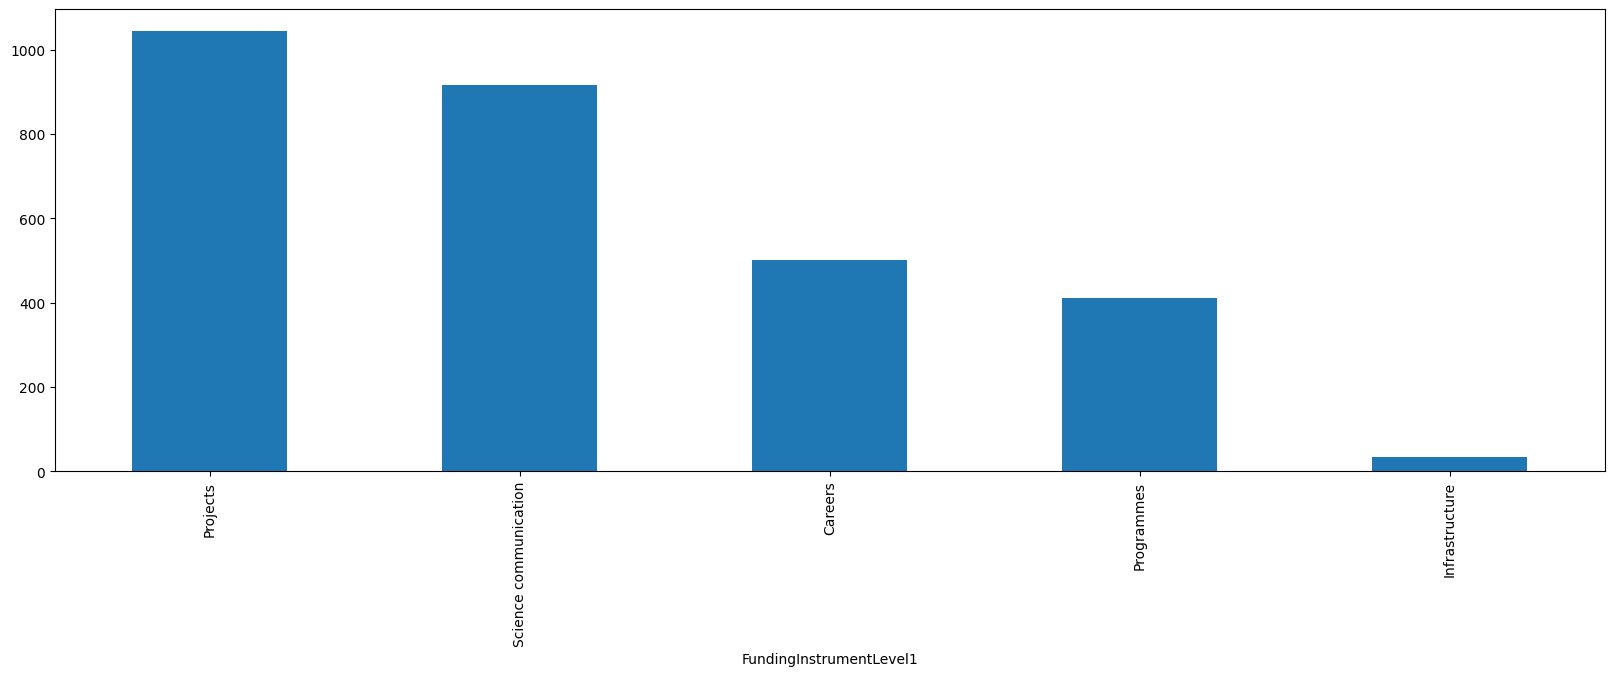

In [46]:
# Barplot of the number of grants per "FundingInstrumentPublished"
plt.figure(figsize=(20, 6))
df_2024["FundingInstrumentLevel1"].value_counts().plot(kind='bar')

In [18]:
# Show distribution of number of projects per year
df.groupby('CallDecisionYear').size()


CallDecisionYear
1975     281
1976     517
1977     514
1978     502
1979     501
1980     530
1981     532
1982     532
1983     575
1984     583
1985     561
1986     686
1987     649
1988     679
1989     703
1990     702
1991     762
1992     770
1993     757
1994     818
1995     770
1996     839
1997     799
1998     818
1999     748
2000     843
2001     797
2002     771
2003     860
2004     927
2005     931
2006    1000
2007    1004
2008    1032
2009     977
2010    1040
2011    1087
2012    1131
2013    1188
2014    1057
2015    1035
2016     998
2017     895
2018     882
2019     845
2020     693
2021     678
2022     753
2023     779
2024     838
2025      28
dtype: int64

<Axes: >

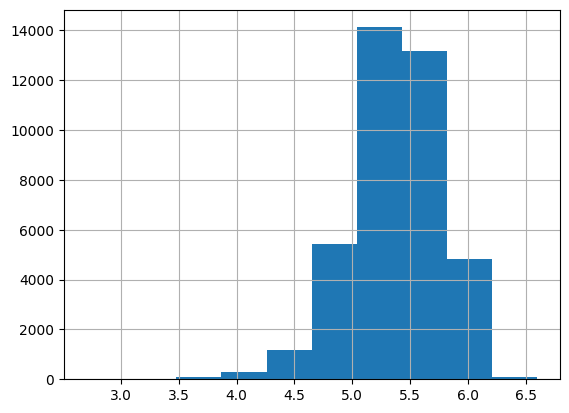

In [19]:
# Show distribution of amount of money granted as a histogram
np.log10(df['AmountGrantedAllSets']).hist()
#df['AmountGrantedAllSets'].describe()